In [627]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [525]:
chrome_option = webdriver.ChromeOptions()
chrome_option.add_experimental_option("detach", True)
chrome_option.add_argument("Accept-Language= en-US,en;q=0.8")

In [527]:
structured_content = []

In [545]:
url = "https://www.amazon.in/"
driver = webdriver.Chrome()
driver.get(url=url)
time.sleep(2)

In [547]:
search_bar = driver.find_element(By.NAME, "field-keywords")
search_bar.send_keys("mobile phones", Keys.ENTER)
time.sleep(3)

In [549]:
product_details = []
def elements():
    products_result = driver.find_elements(By.CSS_SELECTOR, '[data-component-type="s-search-result"]')
    for index , product in enumerate(products_result):
        try:
            # Extract product title
            p_name = product.find_element(By.CSS_SELECTOR, ".a-section div h2 a span").text  # Adjust the selector
        except:
            p_name = 'N/A'

        try:
            # Extract product price
            p_price = product.find_element(By.CSS_SELECTOR, ".a-price-whole").text  # Adjust the selector
        except:
            p_price = 'N/A'

        try:
            # Extract product review count
            p_review_count = product.find_element(By.CSS_SELECTOR, '[data-cy="reviews-block"] .a-size-base').text  # Adjust the selector
        except:
            p_review_count = 'N/A'

        try:
            # Extract product bought last month
            p_bought_last_month = product.find_element(By.CSS_SELECTOR, '[data-cy="reviews-block"] .a-color-secondary').text  # Adjust the selector
        except:
            p_bought_last_month = 'N/A'

        try:
            # Extract product rating
            soup = BeautifulSoup(driver.page_source, 'html.parser')
            p_rating = soup.select('[data-cy="reviews-ratings-slot"] .a-icon-alt')[index].getText()  # Adjust the selector
        except:
            p_rating = 'N/A'

        # Append the details to the list
        product_details.append([p_name, p_price, p_review_count, p_bought_last_month, p_rating])

    return product_details
        


    

In [551]:
for i in range(1,11):
    elements()
    try:
        next_button = driver.find_element(By.CSS_SELECTOR, ".s-pagination-button")
        next_button.click()
        time.sleep(5)
    except Exception as e:
        print(f"Error: {e}")
        break

print(len(product_details))
print(product_details)


220
[['Apple iPhone 13 (128GB) - Midnight', '51,999', '28,939', '500+ bought in past month', '4.5 out of 5 stars'], ['Apple iPhone 15 (128 GB) - Green', '69,999', '2,142', '200+ bought in past month', '4.5 out of 5 stars'], ['Redmi 13C (Stardust Black, 4GB RAM, 128GB Storage) | Powered by 4G Mediatek Helio G85 | 90Hz Display | 50MP AI Triple Camera', '7,698', '7,187', '5K+ bought in past month', '4.1 out of 5 stars'], ["realme NARZO N65 5G (Deep Green 6GB RAM, 128GB Storage) India's 1st D6300 5G Chipset | Ultra Slim Design | 120Hz Eye Comfort Display | 50MP AI Camera| Charger in The Box", '12,498', '676', '5K+ bought in past month', '4.1 out of 5 stars'], ['POCO C65 (Pastel Blue 4GB RAM 128GB Storage)', '6,998', '2,050', '5K+ bought in past month', '4.0 out of 5 stars'], ['Samsung Galaxy M35 5G (Thunder Grey,6GB RAM,128GB Storage)| Corning Gorilla Glass Victus+| AnTuTu Score 595K+ | Vapour Cooling Chamber | 6000mAh Battery | 120Hz Super AMOLED Display| Without Charger', '19,998', '1,28

In [555]:
columns = ["Product Name", "Price", "Number of Review", "Previous Month Buyers","Rating Out of 5"]
df = pd.DataFrame(product_details, columns=columns)
df.to_csv("Amazon Scraped Data", index=False)

In [559]:
df.head()

,Product Name,Price,Number of Review,Previous Month Buyers,Rating Out of 5
0,Apple iPhone 13 (128GB) - Midnight,"51,999","28,939",500+ bought in past month,4.5 out of 5 stars
1,Apple iPhone 15 (128 GB) - Green,"69,999","2,142",200+ bought in past month,4.5 out of 5 stars
2,"Redmi 13C (Stardust Black, 4GB RAM, 128GB Stor...","7,698","7,187",5K+ bought in past month,4.1 out of 5 stars
3,"realme NARZO N65 5G (Deep Green 6GB RAM, 128GB...","12,498",676,5K+ bought in past month,4.1 out of 5 stars
4,POCO C65 (Pastel Blue 4GB RAM 128GB Storage),"6,998","2,050",5K+ bought in past month,4.0 out of 5 stars


In [561]:
df.tail()

,Product Name,Price,Number of Review,Previous Month Buyers,Rating Out of 5
215,"Redmi 13C 5G (Startrail Green, 4GB RAM, 128GB ...","10,498","7,236",5K+ bought in past month,4.0 out of 5 stars
216,"OnePlus Nord CE 3 Lite 5G (Pastel Lime, 8GB RA...","16,845","49,759",1K+ bought in past month,4.2 out of 5 stars
217,POCO C65 (Pastel Green 4GB RAM 128GB Storage),"6,998","2,050",3K+ bought in past month,4.0 out of 5 stars
218,Apple iPhone 14 Plus (128 GB) - Starlight,"64,999","1,993",200+ bought in past month,4.5 out of 5 stars
219,Apple iPhone 15 Pro (1 TB) - Blue Titanium,"1,75,300",323,N/A,4.3 out of 5 stars


In [ ]:
# Task:Data Cleaning

In [575]:
df["Brand"] = df["Product Name"].str.split().str[0]

In [579]:
df["Brand"] = df["Brand"].str.title()

In [581]:
df.head()

,Product Name,Price,Number of Review,Previous Month Buyers,Rating Out of 5,Brand
0,Apple iPhone 13 (128GB) - Midnight,"51,999","28,939",500+ bought in past month,4.5 out of 5 stars,Apple
1,Apple iPhone 15 (128 GB) - Green,"69,999","2,142",200+ bought in past month,4.5 out of 5 stars,Apple
2,"Redmi 13C (Stardust Black, 4GB RAM, 128GB Stor...","7,698","7,187",5K+ bought in past month,4.1 out of 5 stars,Redmi
3,"realme NARZO N65 5G (Deep Green 6GB RAM, 128GB...","12,498",676,5K+ bought in past month,4.1 out of 5 stars,Realme
4,POCO C65 (Pastel Blue 4GB RAM 128GB Storage),"6,998","2,050",5K+ bought in past month,4.0 out of 5 stars,Poco


In [589]:
df["Rating"] = df["Rating Out of 5"].str.split().str[0]
df.head()

,Product Name,Price,Number of Review,Previous Month Buyers,Rating Out of 5,Brand,Rating
0,Apple iPhone 13 (128GB) - Midnight,51999,"28,939",500+ bought in past month,4.5 out of 5 stars,Apple,4.5
1,Apple iPhone 15 (128 GB) - Green,69999,"2,142",200+ bought in past month,4.5 out of 5 stars,Apple,4.5
2,"Redmi 13C (Stardust Black, 4GB RAM, 128GB Stor...",7698,"7,187",5K+ bought in past month,4.1 out of 5 stars,Redmi,4.1
3,"realme NARZO N65 5G (Deep Green 6GB RAM, 128GB...",12498,676,5K+ bought in past month,4.1 out of 5 stars,Realme,4.1
4,POCO C65 (Pastel Blue 4GB RAM 128GB Storage),6998,"2,050",5K+ bought in past month,4.0 out of 5 stars,Poco,4.0


In [593]:
df["Price"] = df["Price"].astype(int)
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df.head()

,Product Name,Price,Number of Review,Previous Month Buyers,Rating Out of 5,Brand,Rating
0,Apple iPhone 13 (128GB) - Midnight,51999,"28,939",500+ bought in past month,4.5 out of 5 stars,Apple,4.5
1,Apple iPhone 15 (128 GB) - Green,69999,"2,142",200+ bought in past month,4.5 out of 5 stars,Apple,4.5
2,"Redmi 13C (Stardust Black, 4GB RAM, 128GB Stor...",7698,"7,187",5K+ bought in past month,4.1 out of 5 stars,Redmi,4.1
3,"realme NARZO N65 5G (Deep Green 6GB RAM, 128GB...",12498,676,5K+ bought in past month,4.1 out of 5 stars,Realme,4.1
4,POCO C65 (Pastel Blue 4GB RAM 128GB Storage),6998,"2,050",5K+ bought in past month,4.0 out of 5 stars,Poco,4.0


In [595]:
df["Number of Review"] = df["Number of Review"].str.replace(",", "")
df["Number of Review"]= df["Number of Review"].astype(int)
df.head()

,Product Name,Price,Number of Review,Previous Month Buyers,Rating Out of 5,Brand,Rating
0,Apple iPhone 13 (128GB) - Midnight,51999,28939,500+ bought in past month,4.5 out of 5 stars,Apple,4.5
1,Apple iPhone 15 (128 GB) - Green,69999,2142,200+ bought in past month,4.5 out of 5 stars,Apple,4.5
2,"Redmi 13C (Stardust Black, 4GB RAM, 128GB Stor...",7698,7187,5K+ bought in past month,4.1 out of 5 stars,Redmi,4.1
3,"realme NARZO N65 5G (Deep Green 6GB RAM, 128GB...",12498,676,5K+ bought in past month,4.1 out of 5 stars,Realme,4.1
4,POCO C65 (Pastel Blue 4GB RAM 128GB Storage),6998,2050,5K+ bought in past month,4.0 out of 5 stars,Poco,4.0


In [597]:
cleaned_df = df.dropna()

In [615]:
cleaned_df.shape

(220, 7)

In [715]:
def transform_value(value):
    if pd.isna(value) or 'N/A' in value:
        return 0
    numeric_part = pd.Series(value).str.extract(r'(\d+)').astype(int).iloc[0, 0]
    if pd.isna(numeric_part):
        return 0
    if 'K' in value:
        return numeric_part * 1000
    return numeric_part

df['Previous Month Buyers Numeric'] = df['Previous Month Buyers'].apply(transform_value)
df.tail()

,Product Name,Price,Number of Review,Previous Month Buyers,Rating Out of 5,Brand,Rating,Previous Month Buyers Numeric,Segmentation
215,"Redmi 13C 5G (Startrail Green, 4GB RAM, 128GB ...",10498,7236,5K+ bought in past month,4.0 out of 5 stars,Redmi,4.00,5000,affordable
216,"OnePlus Nord CE 3 Lite 5G (Pastel Lime, 8GB RA...",16845,49759,1K+ bought in past month,4.2 out of 5 stars,Oneplus,4.20,1000,mid range
217,POCO C65 (Pastel Green 4GB RAM 128GB Storage),6998,2050,3K+ bought in past month,4.0 out of 5 stars,Poco,4.00,3000,affordable
218,Apple iPhone 14 Plus (128 GB) - Starlight,64999,1993,200+ bought in past month,4.5 out of 5 stars,Apple,4.50,200,premium
219,Apple iPhone 15 Pro (1 TB) - Blue Titanium,175300,323,N/A,4.3 out of 5 stars,Apple,4.30,0,premium


In [717]:
def segmentation(price):
    if pd.isna(price) or (isinstance(price, str) and 'N/A' in price):
        return 0
    elif isinstance(price, (int, float)):
        if price < 15000:
            return "affordable"
        elif price < 40000:
            return "mid range"
        else:
            return "premium"
    else:
        return 0 


df["Segmentation"] = df["Price"].apply(segmentation)

In [719]:
df.head()

,Product Name,Price,Number of Review,Previous Month Buyers,Rating Out of 5,Brand,Rating,Previous Month Buyers Numeric,Segmentation
0,Apple iPhone 13 (128GB) - Midnight,51999,28939,500+ bought in past month,4.5 out of 5 stars,Apple,4.50,500,premium
1,Apple iPhone 15 (128 GB) - Green,69999,2142,200+ bought in past month,4.5 out of 5 stars,Apple,4.50,200,premium
2,"Redmi 13C (Stardust Black, 4GB RAM, 128GB Stor...",7698,7187,5K+ bought in past month,4.1 out of 5 stars,Redmi,4.10,5000,affordable
3,"realme NARZO N65 5G (Deep Green 6GB RAM, 128GB...",12498,676,5K+ bought in past month,4.1 out of 5 stars,Realme,4.10,5000,affordable
4,POCO C65 (Pastel Blue 4GB RAM 128GB Storage),6998,2050,5K+ bought in past month,4.0 out of 5 stars,Poco,4.00,5000,affordable


In [723]:
df.columns

Index(['Product Name', 'Price', 'Number of Review', 'Previous Month Buyers',
       'Rating Out of 5', 'Brand', 'Rating', 'Previous Month Buyers Numeric',
       'Segmentation'],
      dtype='object')

In [725]:
print(df.dtypes)

Product Name                      object
Price                              int32
Number of Review                   int32
Previous Month Buyers             object
Rating Out of 5                   object
Brand                             object
Rating                           float64
Previous Month Buyers Numeric      int64
Segmentation                      object
dtype: object


In [727]:
print(df.describe())

           Price  Number of Review  Rating  Previous Month Buyers Numeric
count     220.00            220.00  220.00                         220.00
mean   41,084.78          8,104.07    4.16                       2,328.18
std    48,555.23         14,480.40    0.24                       2,049.06
min     6,998.00            103.00    3.70                           0.00
25%    10,498.00            817.00    4.00                         425.00
50%    17,637.00          2,050.00    4.10                       1,500.00
75%    55,249.00          7,187.00    4.40                       5,000.00
max   189,400.00         52,302.00    4.60                       5,000.00


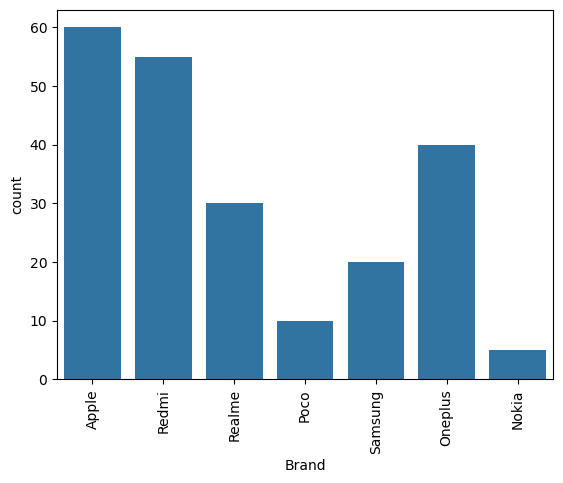

In [729]:
sns.countplot(data=df, x='Brand')
plt.xticks(rotation=90)
plt.show()

In [731]:
#Compare Ratings: Are premium smartphones rated higher on average than affordable ones?
avg_rating_per_segment = df.groupby("Segmentation")["Rating"].mean()
avg_rating_per_segment

Segmentation
affordable   3.99
mid range    4.11
premium      4.43
Name: Rating, dtype: float64

In [733]:
#As we see premium have higher rating let's check the number of rating for each segment
number_of_rating_per_segment = df.groupby("Segmentation")["Number of Review"].sum()
number_of_rating_per_segment

Segmentation
affordable     461870
mid range     1099040
premium        221985
Name: Number of Review, dtype: int32

In [735]:
#let's check the average price range of these segments
pd.options.display.float_format = "{:,.2f}".format
average_price_per_segment = df.groupby("Segmentation")["Price"].mean()
average_price_per_segment

Segmentation
affordable     9,856.39
mid range     22,454.23
premium      102,954.65
Name: Price, dtype: float64

In [737]:
#let's find out the average rating per Brand
avg_rating_per_brand = df.groupby("Brand")["Rating"].mean()
avg_rating_per_brand

Brand
Apple     4.43
Nokia     3.80
Oneplus   4.26
Poco      4.00
Realme    4.03
Redmi     4.00
Samsung   3.90
Name: Rating, dtype: float64

In [739]:
#let's find out the average price per Brand
avg_price_per_brand = df.groupby("Brand")["Price"].mean()
avg_price_per_brand

Brand
Apple     107,701.03
Nokia      11,499.00
Oneplus    26,364.25
Poco        6,998.00
Realme     11,914.67
Redmi      11,507.09
Samsung    20,210.75
Name: Price, dtype: float64

In [741]:
#let's find out the review count per Brand
review_count_per_brand = df.groupby("Brand")["Number of Review"].sum()
review_count_per_brand

Brand
Apple       206735
Nokia        24540
Oneplus    1047520
Poco         20500
Realme       30565
Redmi       432920
Samsung      20115
Name: Number of Review, dtype: int32

In [743]:
#let's find out which brand is getting maximum number of sales as per Previous Month Buyers 
buyer_per_brand = df.groupby("Brand")["Previous Month Buyers Numeric"].sum()
buyer_per_brand

Brand
Apple        9200
Nokia       15000
Oneplus     93000
Poco        40000
Realme     110000
Redmi      205000
Samsung     40000
Name: Previous Month Buyers Numeric, dtype: int64

In [745]:
#let's answer our question whether rating is correalted to our price
correlation = df['Price'].corr(df['Rating'])

print(f"Correlation between Price of smartphone and Rating: {correlation:.2f}")

Correlation between Price of smartphone and Rating: 0.57
